In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

from adtk.visualization import plot

In [2]:
rand = np.random.RandomState(123)

In [3]:
df = pd.DataFrame(np.cumsum(rand.normal(size=(1000, 3)), axis=0), 
                  columns=["Sensor #{}".format(i+1) for i in range(3)],
                  index=pd.date_range(start="2015-5-28", periods=1000, freq="2H"))

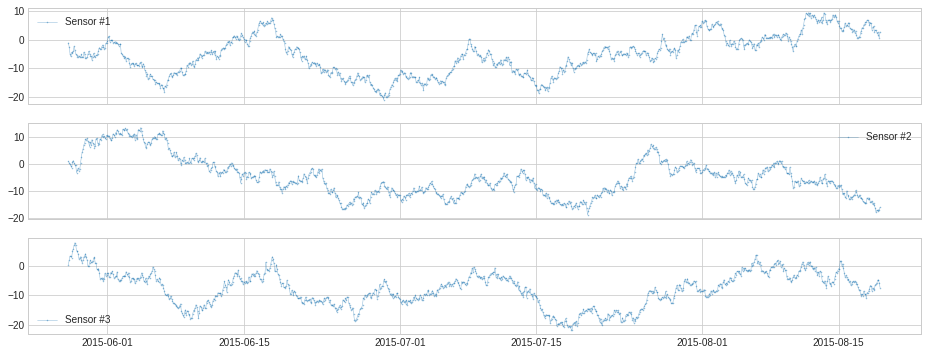

In [4]:
ax = plot(df, figsize=(16, 6))

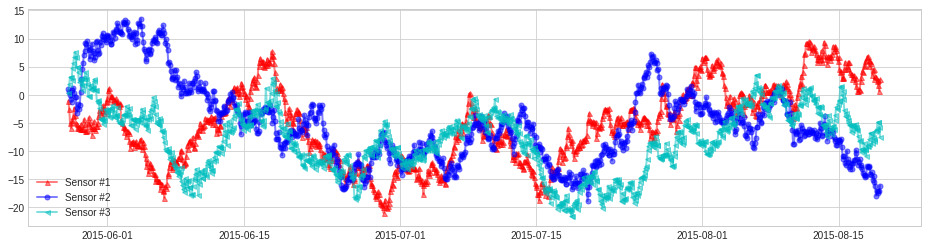

In [5]:
ax = plot(
    df, curve_group='all', 
    ts_linewidth=2,
    ts_color={"Sensor #1": 'r', "Sensor #2": 'b', "Sensor #3": 'c'},
    ts_marker={"Sensor #1": '^', "Sensor #2": 'o', "Sensor #3": '<'},
    ts_markersize=5)

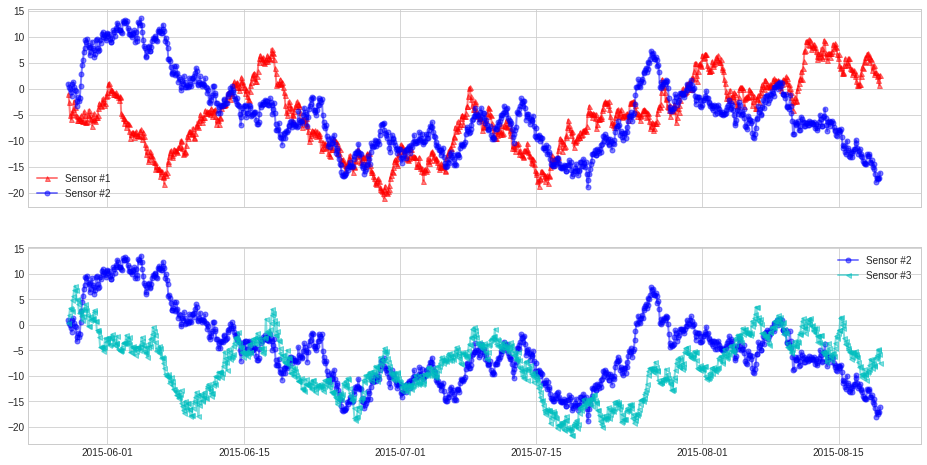

In [6]:
ax = plot(
    df, curve_group=[[0,1], [1,2]],
    ts_linewidth=2,
    ts_color={"Sensor #1": 'r', "Sensor #2": 'b', "Sensor #3": 'c'},
    ts_marker={"Sensor #1": '^', "Sensor #2": 'o', "Sensor #3": '<'},
    ts_markersize=5)

In [7]:
anomaly_true = [pd.Timestamp("2015-5-31 18:00:00"),
                (pd.Timestamp("2015-6-10 8:00:00"), pd.Timestamp("2015-6-12 10:00:00")),
                pd.Timestamp("2015-7-15 3:15:29"),
                (pd.Timestamp("2015-7-20 15:3:20"), pd.Timestamp("2015-8-1 13:25:19"))]

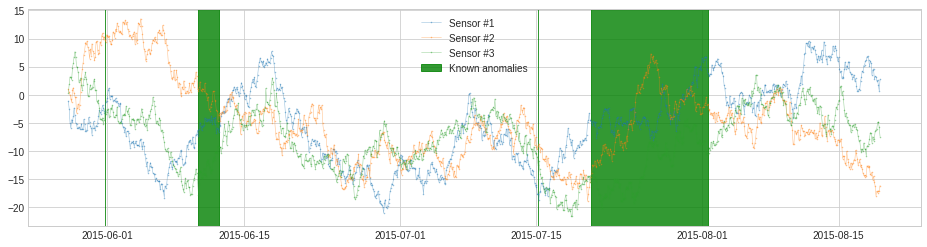

In [8]:
ax = plot(df, anomaly_true, curve_group="all", at_color='g', at_alpha=0.8)

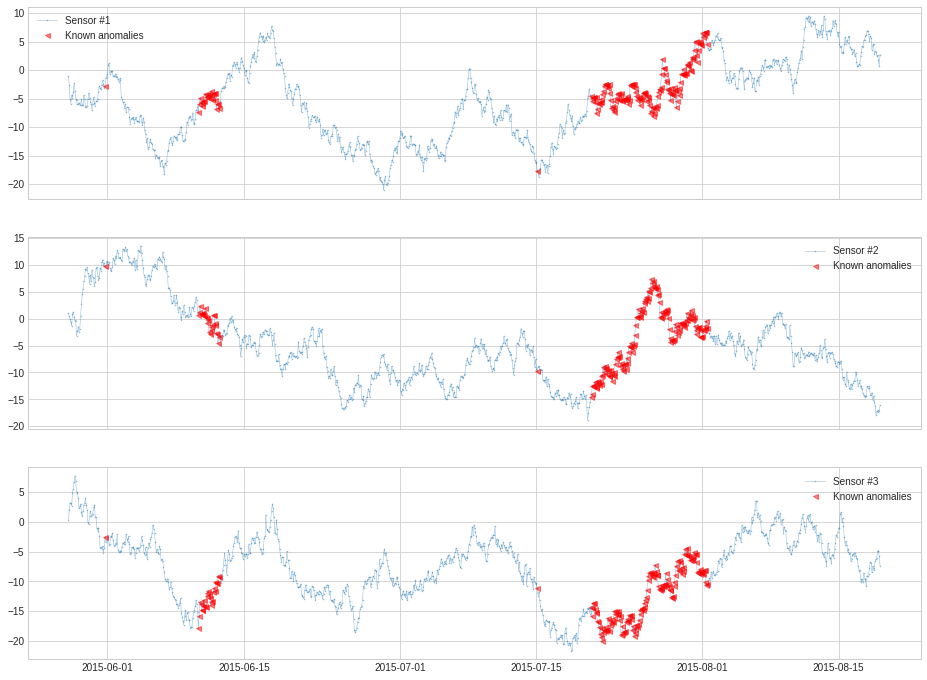

In [9]:
ax = plot(
    df, anomaly_true, 
    at_color='r', at_marker='<', at_markersize=5, at_marker_on_curve=True)

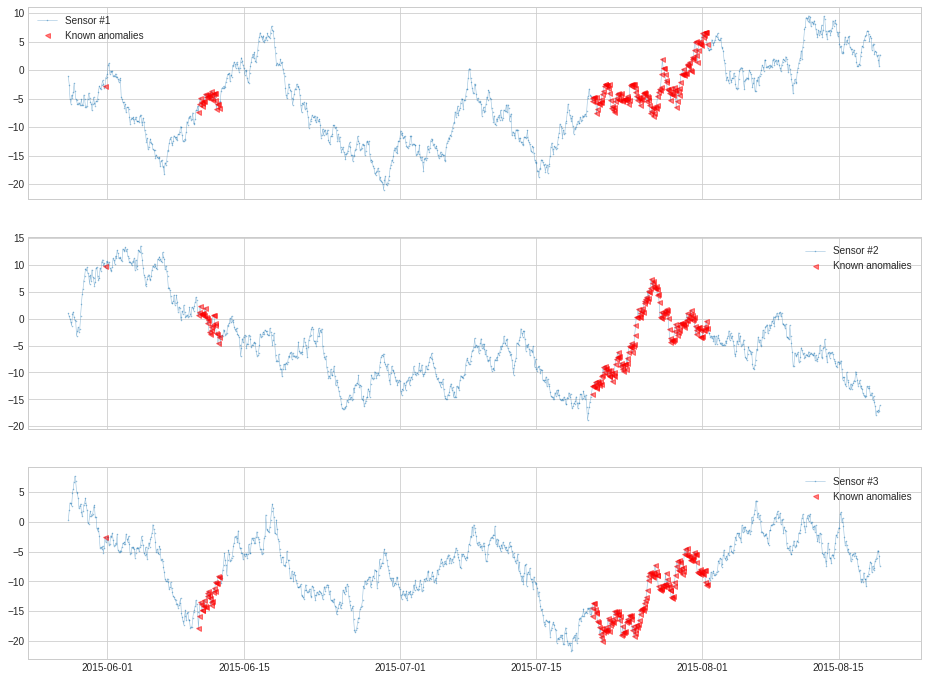

In [10]:
ax = plot(
    df, anomaly_true, 
    at_color='r', at_marker='<', at_markersize=5, at_marker_on_curve=True, 
    freq_as_period=False)

In [11]:
anomaly_pred = [pd.Timestamp("2015-5-31 23:55:07"),
                (pd.Timestamp("2015-6-10 20:00:00"), pd.Timestamp("2015-6-12 18:00:00")),
                pd.Timestamp("2015-7-15 14:00:00"),
                (pd.Timestamp("2015-7-20 23:13:27"), pd.Timestamp("2015-8-2 1:19:25"))]

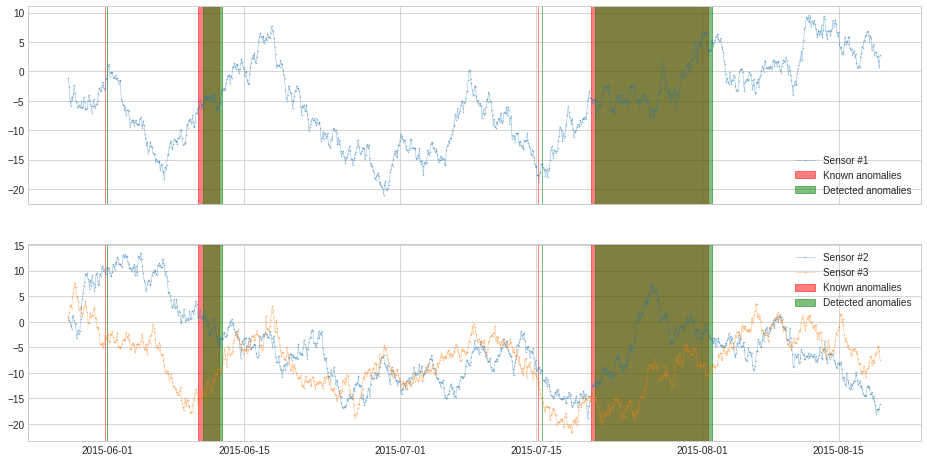

In [12]:
ax = plot(df, anomaly_true, anomaly_pred, curve_group=[[0], [1,2]])

In [13]:
anomaly_true

[Timestamp('2015-05-31 18:00:00'),
 (Timestamp('2015-06-10 08:00:00'), Timestamp('2015-06-12 10:00:00')),
 Timestamp('2015-07-15 03:15:29'),
 (Timestamp('2015-07-20 15:03:20'), Timestamp('2015-08-01 13:25:19'))]

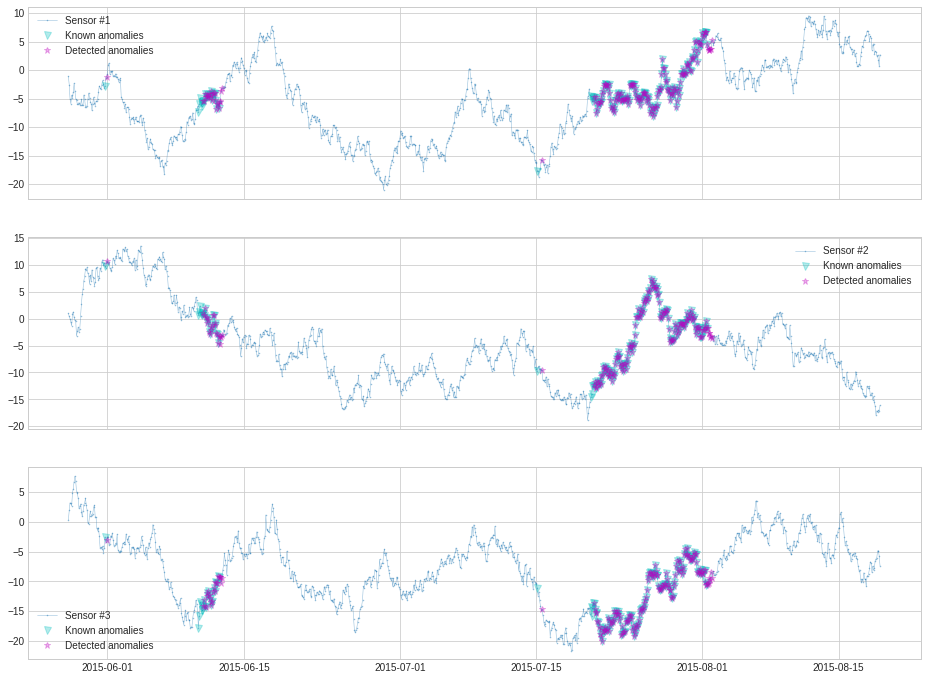

In [14]:
ax = plot(
        df, anomaly_true, anomaly_pred,
        at_color='c', at_alpha=0.3, at_marker='v', at_markersize=7,
        at_marker_on_curve=True,
        ap_color='m', ap_alpha=0.3, ap_marker='*', ap_markersize=7,
        ap_marker_on_curve=True)

In [15]:
anomaly_true = {
    "Type A Anomaly": [pd.Timestamp("2015-5-31 18:00:00"),
                       (pd.Timestamp("2015-6-10 8:00:00"), pd.Timestamp("2015-6-12 10:00:00"))],
    "Type B Anomaly":[pd.Timestamp("2015-7-15 3:15:29"),
                      (pd.Timestamp("2015-7-20 15:3:20"), pd.Timestamp("2015-8-1 13:25:19"))]
}

In [16]:
anomaly_pred = {
    "Type A Anomaly": [pd.Timestamp("2015-5-31 23:55:07"),
                       (pd.Timestamp("2015-6-10 20:00:00"), pd.Timestamp("2015-6-12 18:00:00"))],
    "Type B Anomaly":[pd.Timestamp("2015-7-15 14:00:00"),
                      (pd.Timestamp("2015-7-20 23:13:27"), pd.Timestamp("2015-8-2 1:19:25"))]
}

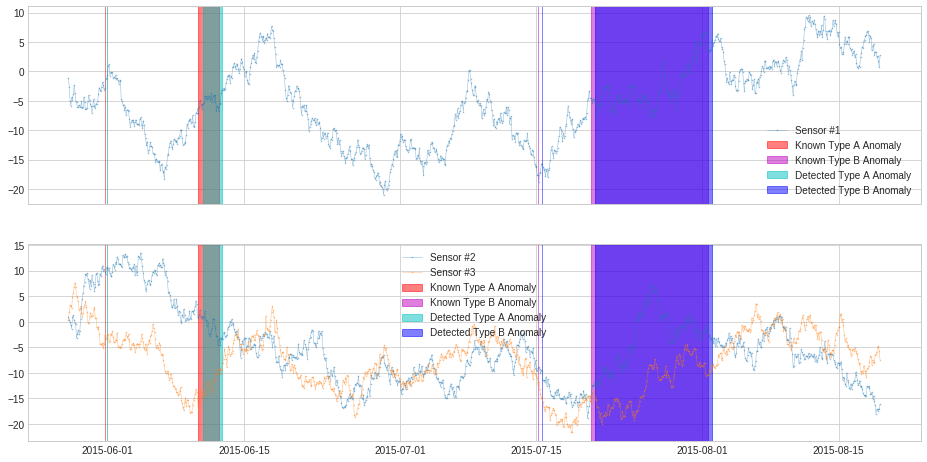

In [17]:
ax = plot(
    df, anomaly_true, anomaly_pred, curve_group=[[0], [1,2]],
    at_color={"Type A Anomaly": 'r', "Type B Anomaly": 'm'},
    ap_color={"Type A Anomaly": 'c', "Type B Anomaly": 'b'})

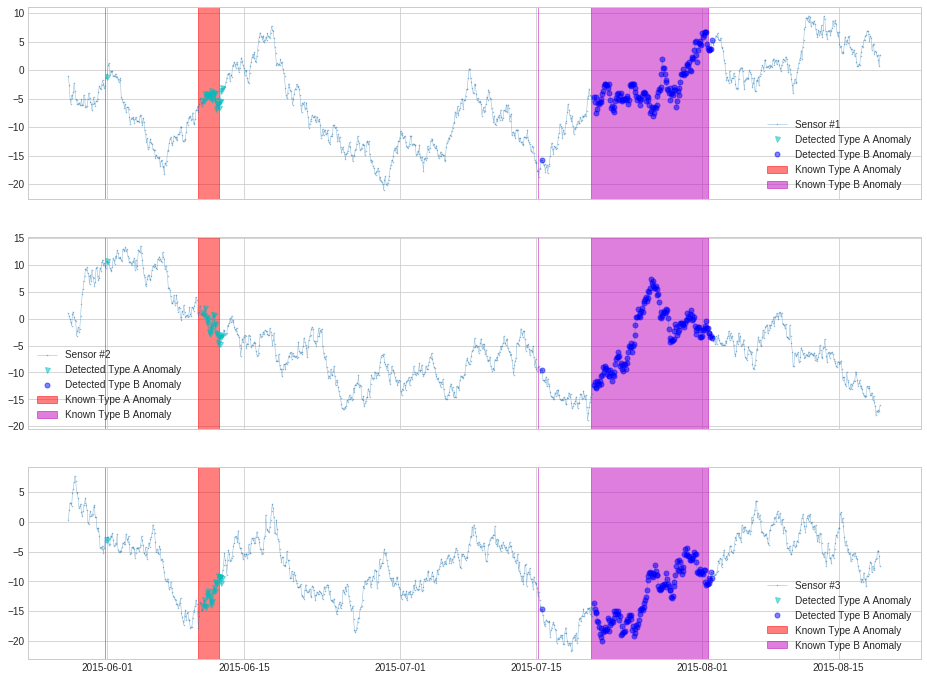

In [18]:
ax = plot(
    df, anomaly_true, anomaly_pred,
    at_color={"Type A Anomaly": 'r', "Type B Anomaly": 'm'},
    ap_color={"Type A Anomaly": 'c', "Type B Anomaly": 'b'}, 
    ap_marker={"Type A Anomaly": 'v', "Type B Anomaly": 'o'},
    ap_markersize=5,
    at_marker_on_curve=False, ap_marker_on_curve=True)

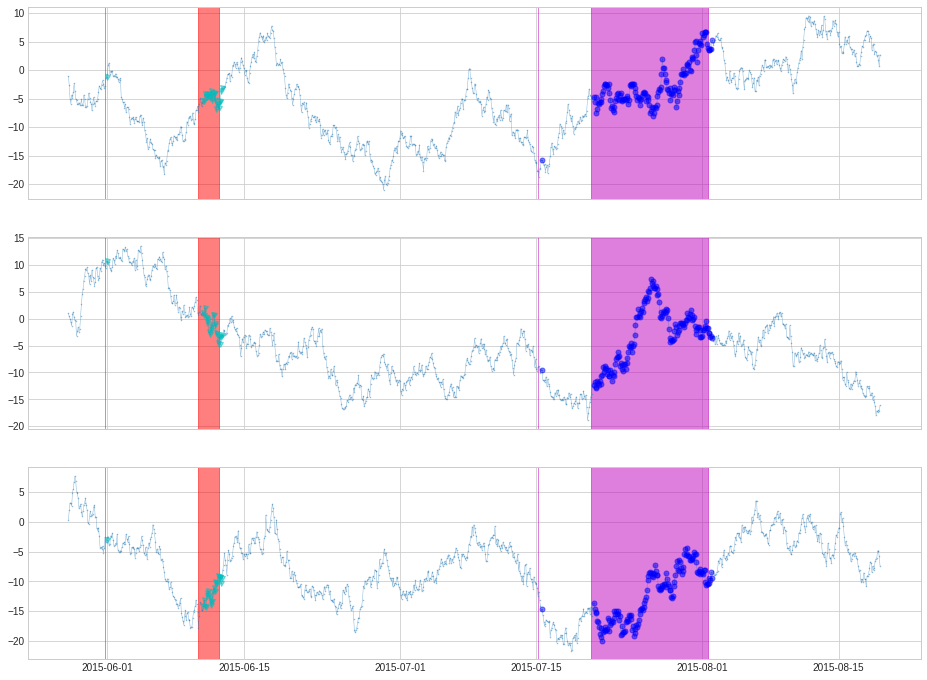

In [19]:
ax = plot(
    df, anomaly_true, anomaly_pred,
    at_color={"Type A Anomaly": 'r', "Type B Anomaly": 'm'},
    ap_color={"Type A Anomaly": 'c', "Type B Anomaly": 'b'}, 
    ap_marker={"Type A Anomaly": 'v', "Type B Anomaly": 'o'},
    ap_markersize=5,
    at_marker_on_curve=False, ap_marker_on_curve=True,
    legend=False
)